### Arbitary Value Imputation

It consists of replacing NAN values an arbitary value.
This technique was derived from Kaggle compitition.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("titanic.csv", usecols= ["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
def impute_nan(df,variable):
    df[variable+'_hundred'] = df.variable.fillna(100)
    df[variable+'_zeros'] = df.variable.fillna(00)

<AxesSubplot:>

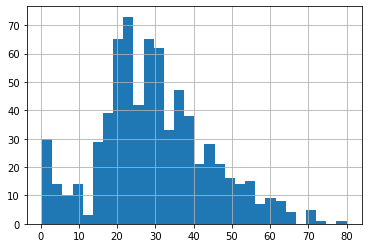

In [28]:
df.Age.hist(bins=30)

#### Arbitary values
#### It should be more frequently present.

### Advantages
- Easy to implement
- Capture the importance of missingess if there is one.

### Disadvantages
- Distorts the original distribution of the variable.
- If missing is not important, it may mask the predictive power of the original variable by distoring its distributation.
- Hard to decide which value to use.

### How to handle Categorical Missing Values

#### Frequent Category Imputation

In [60]:
pd.options.display.max_columns=None
df = pd.read_csv("loan.csv", usecols= ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [66]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

<AxesSubplot:xlabel='BsmtQual'>

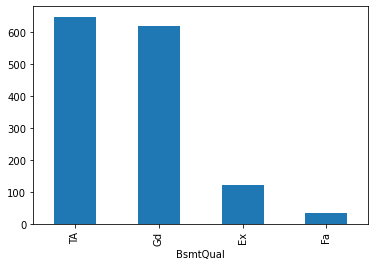

In [73]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

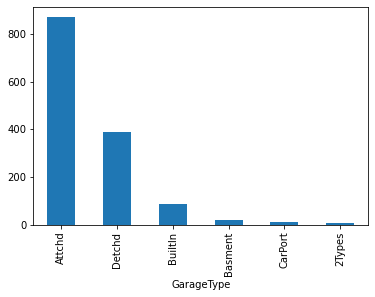

In [74]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:>

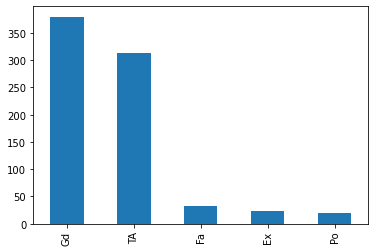

In [76]:
df['FireplaceQu'].value_counts().sort_values(ascending = False).plot.bar()

In [84]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [82]:
#### Replacing function

def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace = True)

In [83]:
for feature in ['FireplaceQu','GarageType','BsmtQual']:
    impute_nan(df,feature)

In [85]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Advantages
1. Easy to implement
2. Faster way to implement

### Disadvantages
1. Since we are using most frequent labels. it may use them in an over represented way, if there are many nans.
2. It distorts the relation of the most frequent label.

### Adding a variable

In [3]:
df = pd.read_csv("loan.csv", usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
import numpy as np
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [5]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [10]:
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [11]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [12]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [13]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [14]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose we have most frequent categories we just replace nan with new category

In [16]:
df = pd.read_csv("loan.csv", usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
def impute_nan(df,variable):
    df[variable+"newvar"] = np.where(df[variable].isnull(),"missing", df[variable])

In [18]:
for feature in ['FireplaceQu','GarageType','BsmtQual']:
    impute_nan(df,feature)

In [19]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQunewvar,GarageTypenewvar,BsmtQualnewvar
0,Gd,NaN,Attchd,208500,missing,Attchd,Gd
1,Gd,TA,Attchd,181500,TA,Attchd,Gd
2,Gd,TA,Attchd,223500,TA,Attchd,Gd
3,TA,Gd,Detchd,140000,Gd,Detchd,TA
4,Gd,TA,Attchd,250000,TA,Attchd,Gd


In [20]:
df = df.drop(['FireplaceQu','GarageType','BsmtQual'],axis=1)
df.head()

,SalePrice,FireplaceQunewvar,GarageTypenewvar,BsmtQualnewvar
0,208500,missing,Attchd,Gd
1,181500,TA,Attchd,Gd
2,223500,TA,Attchd,Gd
3,140000,Gd,Detchd,TA
4,250000,TA,Attchd,Gd


### Handle Categorical Features

#### One hot Encoding

In [25]:
import numpy as np
df = pd.read_csv("titanic.csv", usecols = ['Sex'])
df.head()

<IPython.core.display.Javascript object>

,Sex
0,male
1,female
2,female
3,female
4,male


In [26]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [28]:
pd.get_dummies(df, drop_first = True).head()

<IPython.core.display.Javascript object>

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [29]:
df = pd.read_csv("titanic.csv", usecols = ['Embarked'])
df.head()

<IPython.core.display.Javascript object>

,Embarked
0,S
1,C
2,S
3,S
4,S


In [31]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
df.dropna(inplace = True)

In [33]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
pd.get_dummies(df, drop_first = True).head()

<IPython.core.display.Javascript object>

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### One hot encoding with many categories in a feature

In [37]:
df = pd.read_csv('mercedesbenz.csv', usecols = ["X0","X1","X2","X3","X4","X5","X6"])
df.head()

<IPython.core.display.Javascript object>

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [44]:
for i in df.columns:
    print(i, ":",len(df[i].unique()))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [49]:
df.X1.value_counts(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [50]:
list_10 = df.X1.value_counts(ascending=False).head(10).index

In [53]:
list_10 = list(list_10)
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [54]:
for categories in list_10:
    df[categories] = np.where(df['X1'].isnull(),1,0)

In [56]:
list_10.append('X1')

In [59]:
df[list_10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,0,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,0,0,0,0,0,0,v
